In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

path_to_df_shape_file = 'data/1.Drinking-fountains/drinking-fountains.shp'
path_to_df_greenways_file = 'data/2.greenways/greenways.shp'

greenways = gpd.read_file(path_to_df_greenways_file)
drinking_fountains = gpd.read_file(path_to_df_shape_file)

crs_name = greenways.crs.name

print("The CRS Name for the greenways data is:", crs_name)

The CRS Name for the greenways data is: WGS 84


In [7]:
crs_name = drinking_fountains.crs.name

print("The CRS Name for the drinking fountain data is:", crs_name)

The CRS Name for the drinking fountain data is: WGS 84


So I need to convert the buffer distance from meters to degrees


In [13]:
buffer_distance_meters = 80

buffer_distance_degrees = buffer_distance_meters / (111319.9 * 1)  # Approximate conversion factor for WGS 84
print(f"The buffer distance of 80 m is equivalent to {buffer_distance_degrees:.8f} degrees")

The buffer distance of 80 m is equivalent to 0.00071865 degrees


/tmp/ipykernel_25339/2241993333.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  greenways_buffer = greenways.buffer(buffer_distance_degrees)


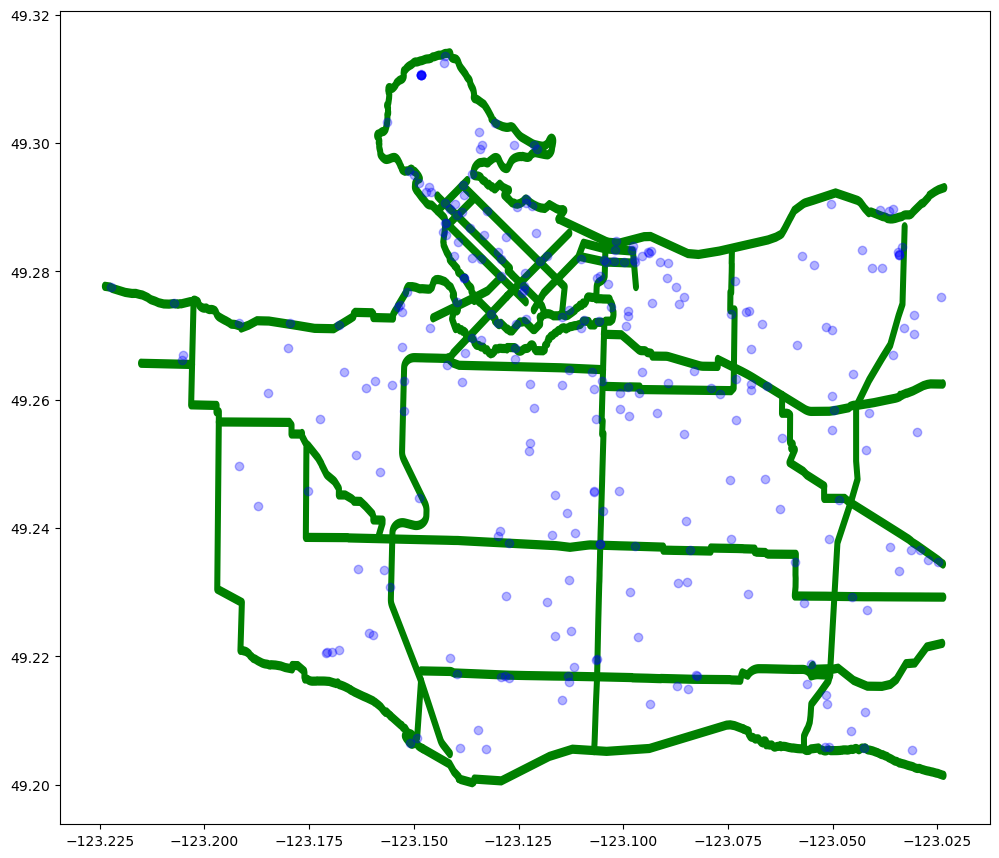

In [17]:
greenways_buffer = greenways.buffer(buffer_distance_degrees)
fig, ax = plt.subplots(figsize=(12,12))
greenways_buffer.plot(ax=ax, color='green')
drinking_fountains.plot(ax=ax, color='blue', alpha=0.3)
plt.show()
#plt.savefig('plots/80_m_buffered_greenways_plus_df.png')


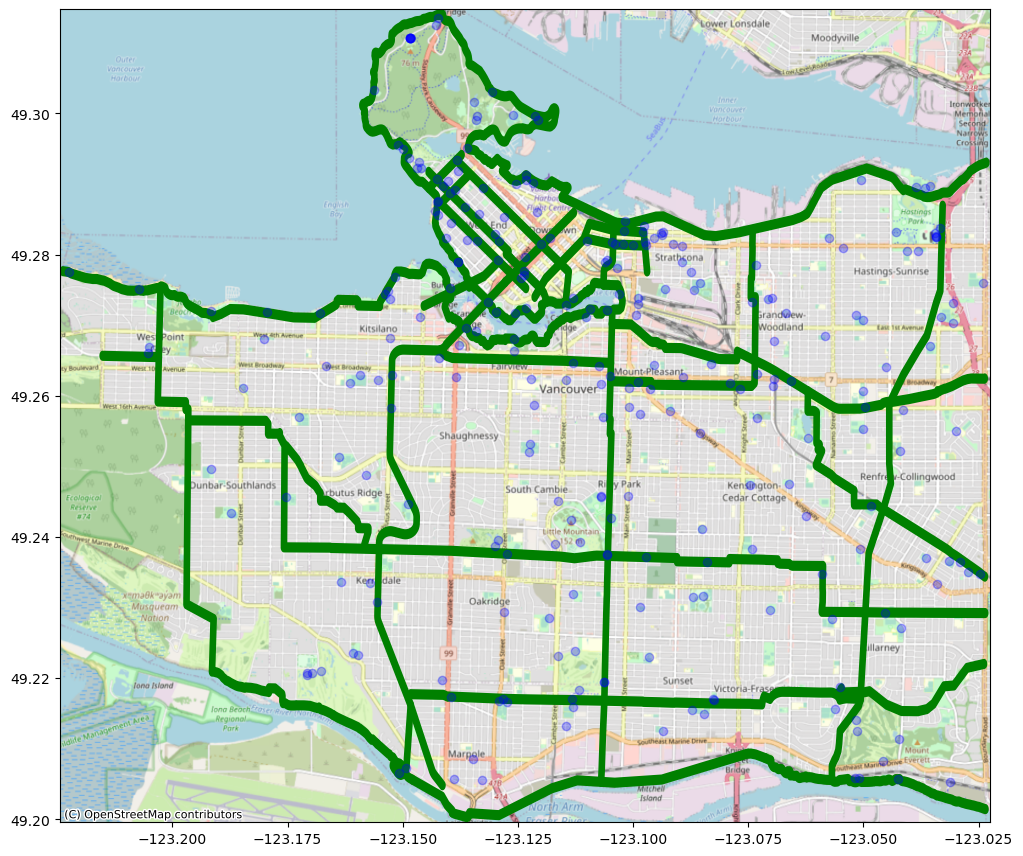

In [27]:
plot_extent = greenways_buffer.total_bounds

fig, ax = plt.subplots(figsize=(12, 12)) 

ax.set_xlim(plot_extent[0], plot_extent[2])
ax.set_ylim(plot_extent[1], plot_extent[3])

ctx.add_basemap(ax, crs=greenways_buffer.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

greenways_buffer.plot(ax=ax, color='green')
drinking_fountains.plot(ax=ax, color='blue', alpha=0.3)

#plt.savefig('plots/80_m_buffered_greenways_plus_df_with_osm.png')
plt.show()


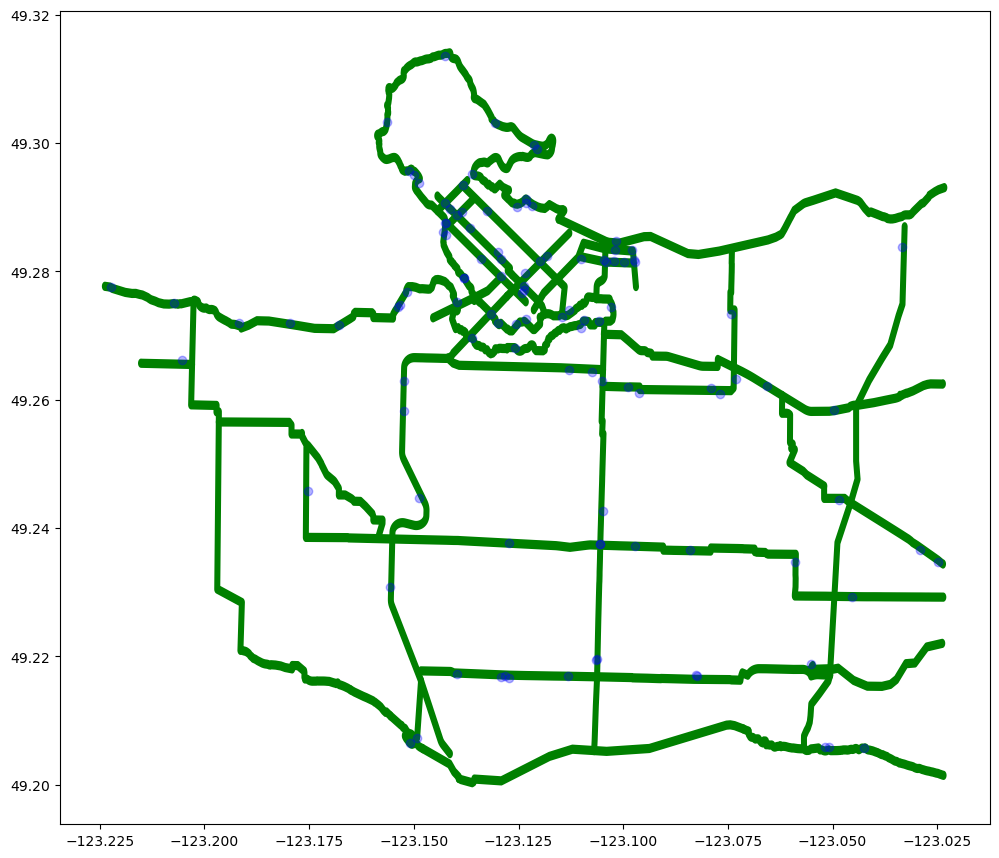

In [28]:
# Perform spatial operation to select drinking fountains within the buffered zone
fountains_within_buffer = drinking_fountains[drinking_fountains.intersects(greenways_buffer.unary_union)]

# Plotting the results
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the buffered greenways
greenways_buffer.plot(ax=ax, color='green')

# Plot the drinking fountains within the buffer zone
fountains_within_buffer.plot(ax=ax, color='blue', alpha=0.3)

plt.show()


In [147]:
fountains_within_buffer

,mapid,name,location,maintainer,in_operatio,pet_friendl,photo_name,geo_local_a,geometry
5,DFPB0023,Fountain location:\nCoal Harbour Park,near playground,Parks,spring to fall,NaN,NaN,Downtown,POINT (-123.12537 49.28998)
6,DFPB0033,Fountain location:\nDavid Lam Park - South wes...,"E area, near playground",Parks,spring to fall,NaN,NaN,Downtown,POINT (-123.12327 49.27250)
9,DFPB0039,Fountain location:\nEmery Barnes Park - Dog of...,NaN,Parks,NaN,NaN,NaN,Downtown,POINT (-123.12378 49.27710)
10,DFPB0046,Fountain location:\nFraser River Park - park e...,near park entrance by Angus Dr,Parks,spring to fall,NaN,Fraser River Park - drinking fountain - 2007.JPG,Kerrisdale,POINT (-123.14932 49.20723)
18,DFPB0084,Fountain location:\nKitsilano Beach Park - Nor...,besides parking lot,Parks,spring to fall,NaN,NaN,Kitsilano,POINT (-123.15173 49.27685)
...,...,...,...,...,...,...,...,...,...
268,DFENG0043,Fountain location: Ormidale St & Vanness Avenue,Southeast corner of Ormidale St & Vanness Avenue,Engineering,Year Round,N,ormidale_vanness.jpg,Renfrew-Collingwood,POINT (-123.02472 49.23470)
270,DFENG0038,Fountain location:Nelson & Howe,Southeast corner of Nelson & Howe,Engineering,Year Round,N,nelson_howe.jpg,Downtown,POINT (-123.12351 49.27967)
272,DFENG0703,Temporary Fountain location: Main & E Hastings,NW corner of E Hastings St and Main St,Engineering,May-October,N,NaN,Downtown,POINT (-123.09991 49.28143)
273,DFENG0706,Temporary Fountain location: Powell & Gore,SW corner of Powell St and Gore Ave,Engineering,May-October,N,NaN,Strathcona,POINT (-123.09785 49.28326)


In [148]:
fountains_within_buffer_location = fountains_within_buffer.name
fountains_within_buffer_location

5                  Fountain location:\nCoal Harbour Park
6      Fountain location:\nDavid Lam Park - South wes...
9      Fountain location:\nEmery Barnes Park - Dog of...
10     Fountain location:\nFraser River Park - park e...
18     Fountain location:\nKitsilano Beach Park - Nor...
                             ...                        
268      Fountain location: Ormidale St & Vanness Avenue
270                      Fountain location:Nelson & Howe
272       Temporary Fountain location: Main & E Hastings
273           Temporary Fountain location: Powell & Gore
276     Temporary Handwashing Station location: 384 Main
Name: name, Length: 111, dtype: object

In [149]:
fountains_within_buffer_location = fountains_within_buffer['name'].str.split(':').apply(lambda x:x[-1].strip())
fountains_within_buffer_location

5                                  Coal Harbour Park
6         David Lam Park - South west of playgrounds
9             Emery Barnes Park - Dog off-leash area
10     Fraser River Park - park entrance by Angus Dr
18       Kitsilano Beach Park - North of parking lot
                           ...                      
268                     Ormidale St & Vanness Avenue
270                                    Nelson & Howe
272                                Main & E Hastings
273                                    Powell & Gore
276                                         384 Main
Name: name, Length: 111, dtype: object

In [150]:
type(fountains_within_buffer_df)

pandas.core.series.Series

In [151]:
fountains_within_buffer_geom = fountains_within_buffer['geometry']
fountains_within_buffer_geom

5      POINT (-123.12537 49.28998)
6      POINT (-123.12327 49.27250)
9      POINT (-123.12378 49.27710)
10     POINT (-123.14932 49.20723)
18     POINT (-123.15173 49.27685)
                  ...             
268    POINT (-123.02472 49.23470)
270    POINT (-123.12351 49.27967)
272    POINT (-123.09991 49.28143)
273    POINT (-123.09785 49.28326)
276    POINT (-123.09736 49.28175)
Name: geometry, Length: 111, dtype: geometry

In [152]:
type(fountains_within_buffer_geom)

geopandas.geoseries.GeoSeries

In [157]:
# Assuming you have the geometry series
longitude = fountains_within_buffer_geom.apply(lambda point: point.x)
latitude = fountains_within_buffer_geom.apply(lambda point: point.y)

# Create a DataFrame with longitude and latitude columns
coordinates_df = pd.DataFrame({'Longitude': longitude, 'Latitude': latitude})

coordinates_df


,Longitude,Latitude
5,-123.125370,49.289977
6,-123.123274,49.272500
9,-123.123781,49.277097
10,-123.149322,49.207235
18,-123.151728,49.276845
...,...,...
268,-123.024717,49.234702
270,-123.123513,49.279672
272,-123.099907,49.281431
273,-123.097852,49.283263


In [164]:
import pandas as pd
df = pd.concat([fountains_within_buffer_location, coordinates_df], axis = 1).reset_index(drop=True)

In [165]:
df

,name,Longitude,Latitude
0,Coal Harbour Park,-123.125370,49.289977
1,David Lam Park - South west of playgrounds,-123.123274,49.272500
2,Emery Barnes Park - Dog off-leash area,-123.123781,49.277097
3,Fraser River Park - park entrance by Angus Dr,-123.149322,49.207235
4,Kitsilano Beach Park - North of parking lot,-123.151728,49.276845
...,...,...,...
106,Ormidale St & Vanness Avenue,-123.024717,49.234702
107,Nelson & Howe,-123.123513,49.279672
108,Main & E Hastings,-123.099907,49.281431
109,Powell & Gore,-123.097852,49.283263


In [166]:
from IPython.display import display, Image

# Assuming you have a DataFrame named df
# Convert DataFrame to HTML
html = df.to_html()

# Save the HTML as an image
path_to_save = 'plots/fountains_within_buffer_dataframe.png'
image_path = path_to_save.replace('.png', '.html')
with open(image_path, 'w') as f:
    f.write(html)

# Display and save the HTML as an image
display(Image(filename=image_path, format='png'))


In [168]:

path_to_save = 'plots/fountains_within_buffer_dataframe.csv'
df.to_csv(path_to_save, index=False)


In [169]:

# Example: Plotting a bar chart
plt.bar(df['name'], df['Longitude'], df['Latitude'])

# Save the plot as an image
plt.savefig('plots/fountains_within_buffer_dataframe.png')
plt.close()
